# Introduction

Notebook based on this post: https://www.bogotobogo.com/python/scikit-learn/Perceptron_Model_with_Iris_DataSet.php

We'll define a simple perceptron in order classify two classes (types) of flowers from the Iris dataset, based on two flower features.

We'll update weights using the error measured as the difference between predicted and target values.

# Perceptron class
The following code defines the Perceptron as a Python Class:


In [ ]:
import numpy as np
np.random.seed(32000)
class Perceptron(object):
   def __init__(self, rate = 0.01, niter = 10):
      self.rate = rate
      self.niter = niter

   def fit(self, X, y):
      """Fit training data
      X : Training vectors, X.shape : [#samples, #features]
      y : Target values, y.shape : [#samples]
      """

      # weights (1 weight per input feature + bias)
      self.weight = 2*np.random.random(1 + X.shape[1])-1

      # Number of misclassifications
      self.errors = []  # Number of misclassifications

      for i in range(self.niter):
         err = 0
         for (xi, target) in zip(X, y):
            delta_w = self.rate * (target - self.predict(xi))
            self.weight[1:] = self.weight[1:] + delta_w * xi
            self.weight[0] += delta_w # bias update
            err += int(delta_w != 0.0)
         self.errors.append(err)
      return self

   def calc_output(self, X):
      """Calculate perceptron's output"""
      return np.dot(X, self.weight[1:]) + self.weight[0]

   def predict(self, X):
      """Return class label after unit step"""
      return np.where(self.calc_output(X) >= 0.0, 1, -1)


# Dataset

To test our perceptron implementation, we will load the two flower classes Setosa and Versicolor from the Iris data set. The perceptron rule is not restricted to two dimensions, however, we will only consider the two features sepal length and petal length for visualization purposes.



![iris-machinelearning[1].png](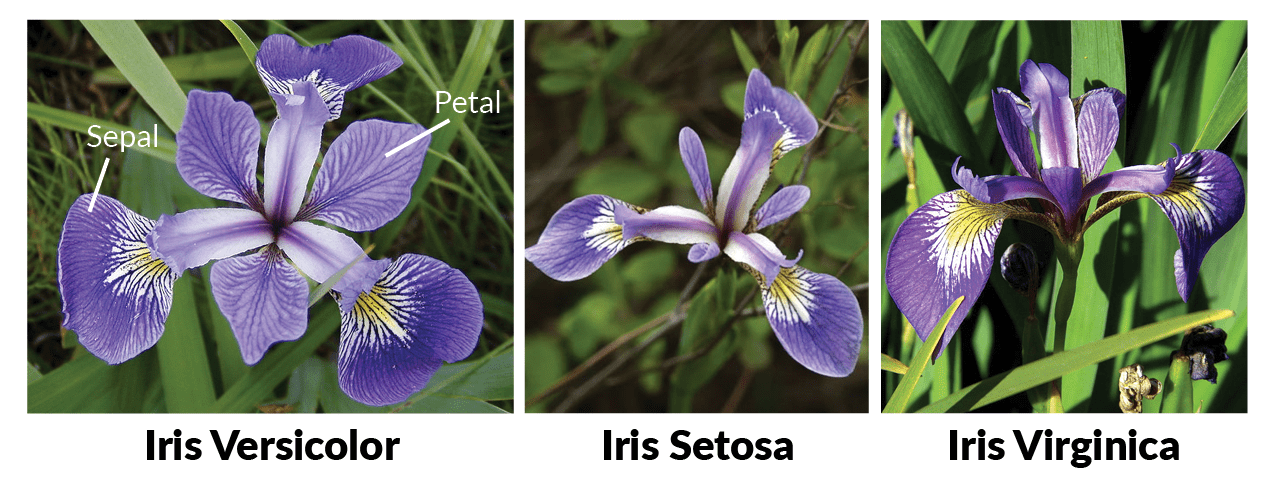)

The irs data is structured in the following 5 columns (the 1st four columns contain the input features and the last one has the class id): <br>
   * *Sepal.Length Sepal.Width Petal.Length Petal.Width Class*




Now, we will use the pandas library to load the Iris data set into a DataFrame object:

In [ ]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.iloc[100:105, :]

,0,1,2,3,4
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


In [ ]:
df.iloc[50:55, :]

,0,1,2,3,4
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [ ]:
df.iloc[0:5, :]

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Next, we extract the first 100 class labels that correspond to the 50 Iris-Setosa and 50 Iris-Versicolor flowers, respectively:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

The we want to convert the class labels into the two integer class labels 1 (Versicolor) and -1 (Setosa) that we assign to a vector y where the values method of a pandas DataFrame yields the corresponding NumPy representation.

In [ ]:
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

Also, we need to extract the first feature column (sepal length) and the third feature column (petal length) of those 100 training samples and assign them to a feature matrix X:


In [ ]:

X = df.iloc[0:100, [0, 3]].values
X = X+0.2*(2*np.random.rand(100,2)-1) # perturbando o conjunto de treinamento com ruído
X

array([[ 5.20139648e+00,  3.49354114e-01],
       [ 4.93789743e+00,  2.43226138e-01],
       [ 4.81896373e+00,  2.41764773e-01],
       [ 4.79428189e+00,  4.57797896e-03],
       [ 5.13347818e+00,  3.04395523e-02],
       [ 5.49682900e+00,  3.46412983e-01],
       [ 4.79033029e+00,  4.53895081e-01],
       [ 4.86342777e+00,  4.88902311e-02],
       [ 4.37526348e+00,  2.71306164e-01],
       [ 4.73250194e+00,  9.20685450e-02],
       [ 5.32796116e+00,  1.75387863e-01],
       [ 4.72340996e+00,  3.04054508e-01],
       [ 4.94615487e+00,  9.56215446e-03],
       [ 4.47798690e+00, -5.77113398e-02],
       [ 5.70523946e+00,  1.72860503e-01],
       [ 5.82761519e+00,  2.94666616e-01],
       [ 5.23794587e+00,  4.44221293e-01],
       [ 5.12471321e+00,  3.45850192e-01],
       [ 5.51670837e+00,  3.58485402e-01],
       [ 5.09388573e+00,  1.14671031e-01],
       [ 5.35224194e+00,  5.27723574e-02],
       [ 5.28108112e+00,  5.98293857e-01],
       [ 4.57946094e+00,  2.68412575e-01],
       [ 5.

We can visualize via a two-dimensional scatter plot using the matplotlib:

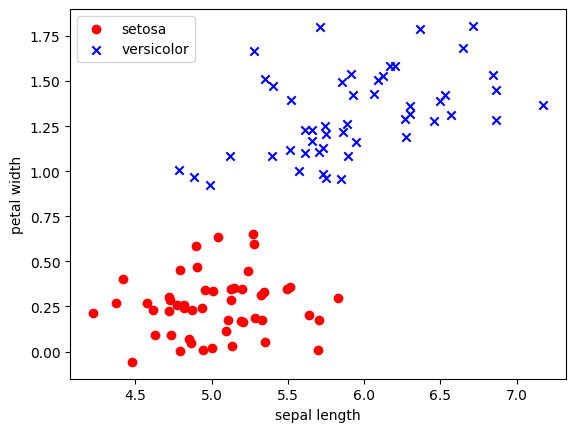

In [ ]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

# Training the perceptron model

![PerceptronDiagram[1].png](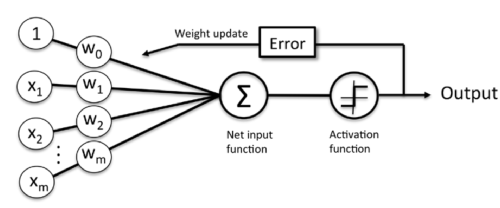)

Now we can train our perceptron algorithm on the Iris data subset that we extracted in the previous section.

We will plot the misclassification error for each epoch to check if the algorithm converged and found a decision boundary that separates the two Iris flower classes.

We can see the plot of the misclassification errors versus the number of epochs as shown below.

Our perceptron converged after a few epochs (iterations). Now we're able to classify the training samples perfectly.

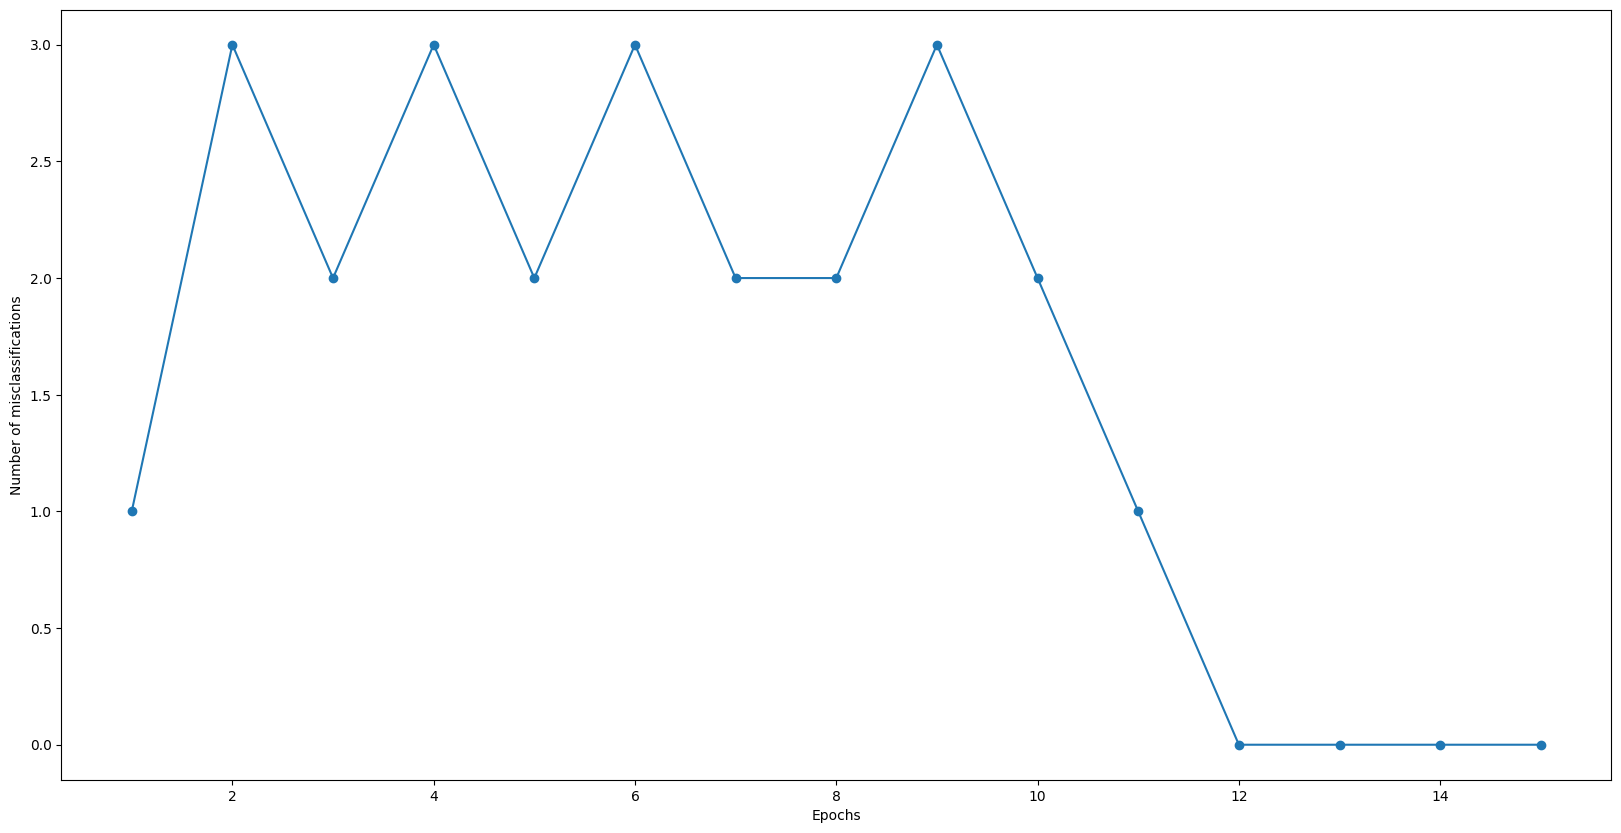

In [ ]:
pn = Perceptron(1, 15)
pn.fit(X, y)
plt.figure(figsize=(20, 10))
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

#Visualize the decision boundaries
To visualize the decision boundaries for our 2D datasets, let's implement a small convenience function:

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgriiid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)

   #print(xx1)
   #print(xx2)
   #print(Z)

In the code above, we define a number of colors and markers and create a color map from the list of colors via ListedColormap.

Then, we determine the minimum and maximum values for the two features and use those feature vectors to create a pair of grid arrays xx1 and xx2 via the NumPy meshgrid function.

Since we trained our perceptron classifier on two feature dimensions, we need to flatten the grid arrays and create a matrix that has the same number of columns as the Iris training subset so that we can use the predict method to predict the class labels Z of the corresponding grid points.

After reshaping the predicted class labels Z into a grid with the same dimensions as xx1 and xx2 , we can now draw a contour plot via matplotlib's contourf function that maps the different decision regions to different colors for each predicted class in the grid array.

As shown in the figure, we can now see a plot of the decision regions.


/tmp/ipython-input-310-2879709536.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


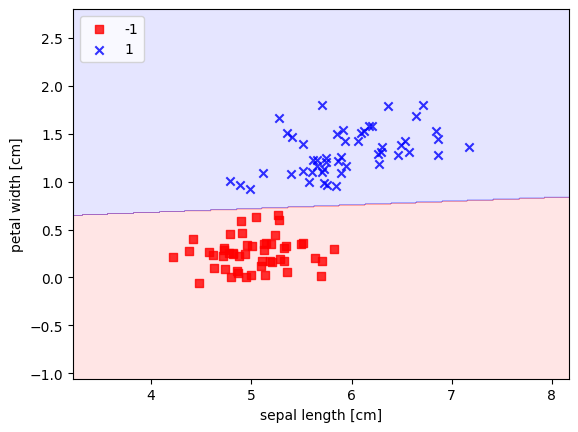

In [ ]:
plot_decision_regions(X, y, classifier=pn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

The perceptron learned a decision boundary that was able to classify all flower samples in the Iris training subset perfectly.

Although the perceptron classified the two Iris flower classes perfectly, convergence is one of the biggest problems of the perceptron.

Frank Rosenblatt proved mathematically that the perceptron learning rule converges if the two classes can be separated by a linear hyperplane.

However, if classes cannot be separated perfectly by such a linear decision boundary, the weights will never stop updating unless we set a maximum number of epochs.

# Vamos praticar !!!

0) Repita o notebook original algumas vezes. Os resultados mudam a cada execução? Em seguida, teste diferentes sementes para o gerador de números aleatórios e rode o notebook todo para cada nova semente. Como ficaram os resultados? Adicione uma célula de texto mais abaixo para suas observações.

1) Com uma semente de números aleatórios fixa, experimente diferentes valores da taxa de aprendizagem e veja o que acontece. Tente explicar o comportamento dos resultados numa célula de texto mais abaixo.

2) Descomente o código que adiciona ruído nos dados e avalie diferentes percentuais de ruído (atualmente está com 0.1). Adicione uma célula de texto mais abaixo para comentar seus achados.

3) Instancie e treine um perceptron com  uma combinação diferente  de 2 características do conjunto de dados Iris e discuta os novos resultados adicionando uma célula de texto mais abaixo.





# Questão 0)


## Parte 1
Após repetir o notebbok original não houve qualquer mudança de resultados em nenhuma das execuções, visto que a semente é a mesma e consequentemente serão os mesmo pesos iniciais.

## Parte 2
Porém com a alteração das sementes e consequentemente dos pesos iniciais houve algumas alterações no resultado das classificações, quando coloquei o valor 1000 o limite de decisão passou bem mais pŕoximo de um entre os dois tipos de flor, embora ainda esteja conseguindo classificar corretamente.
HOuveram também diferenças sútis no gráfico de erros de classificação por épocas.

### semente 0

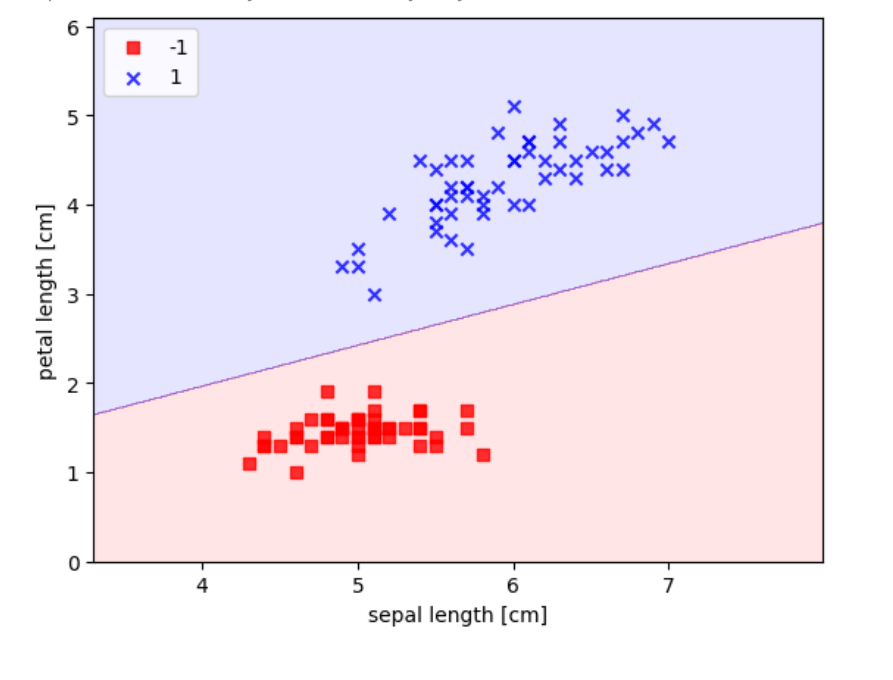



### semente 100
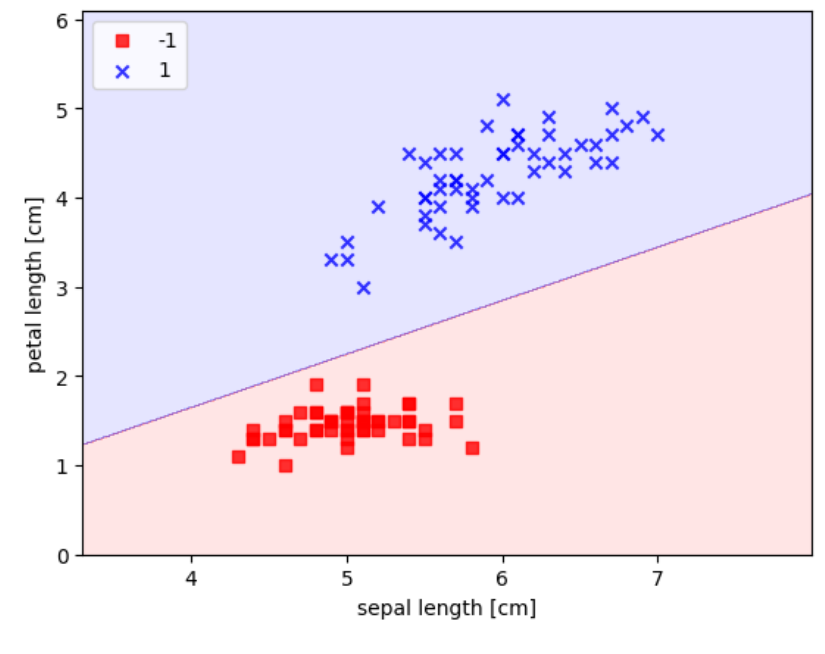

### semente 1000
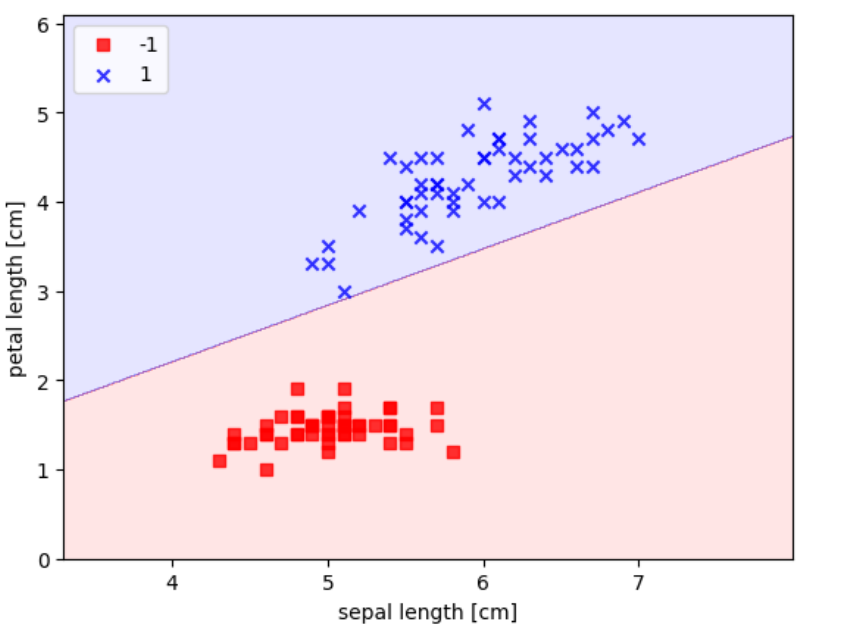


# Questão 1)

## Quanto menor a taxa de aprendizado mais épocas eram necessárias para alcançar um resultado satisfatório de classificação, algo que com taxas maiores era alcançado mais rápido. Porém quando maior a taxa de aprendizado menos seguro ficava as clasifficações, algo que com taxa menores houve um melhor limite de decisão.

### Taxa 0.001

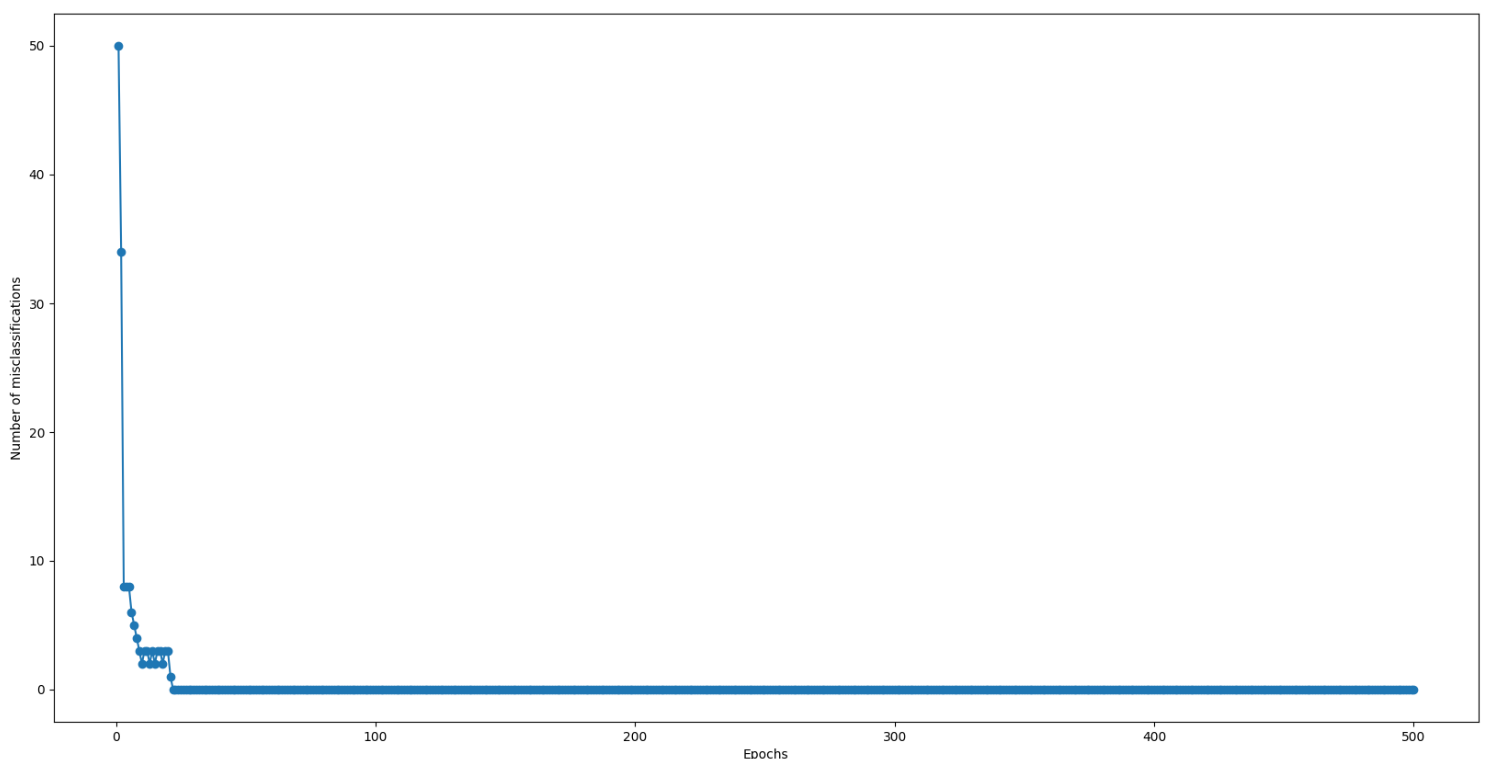

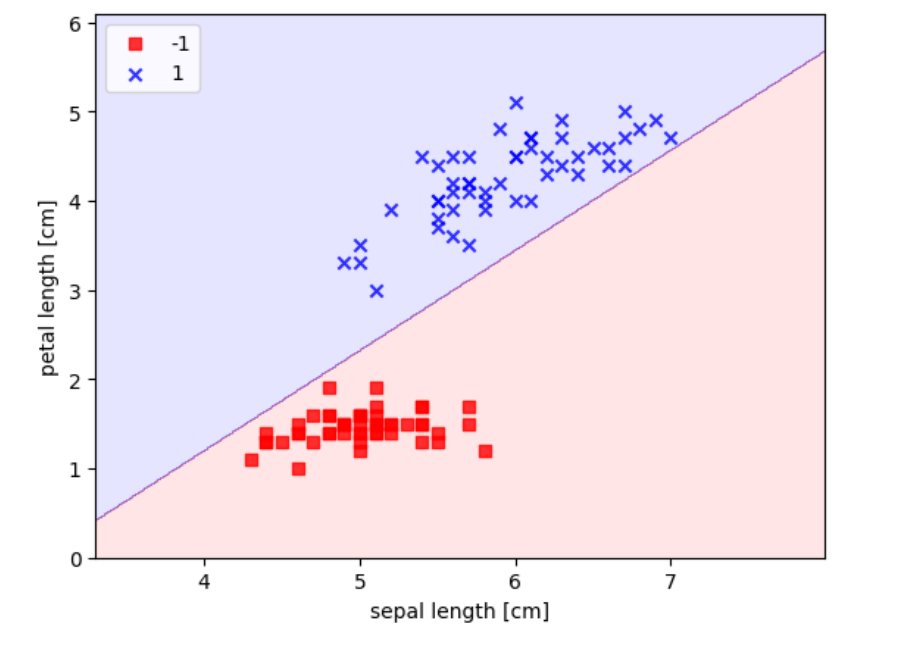

### Taxa 100

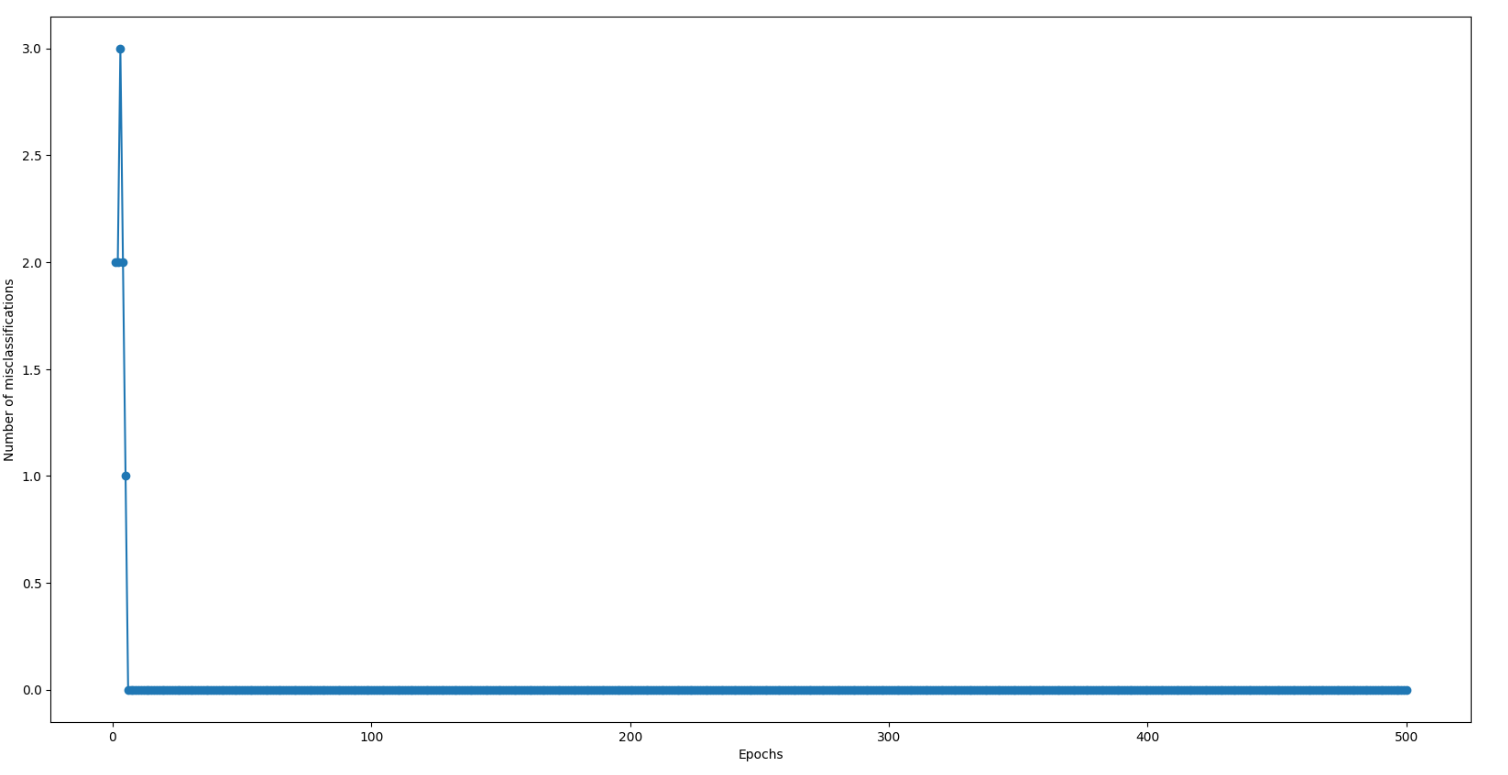

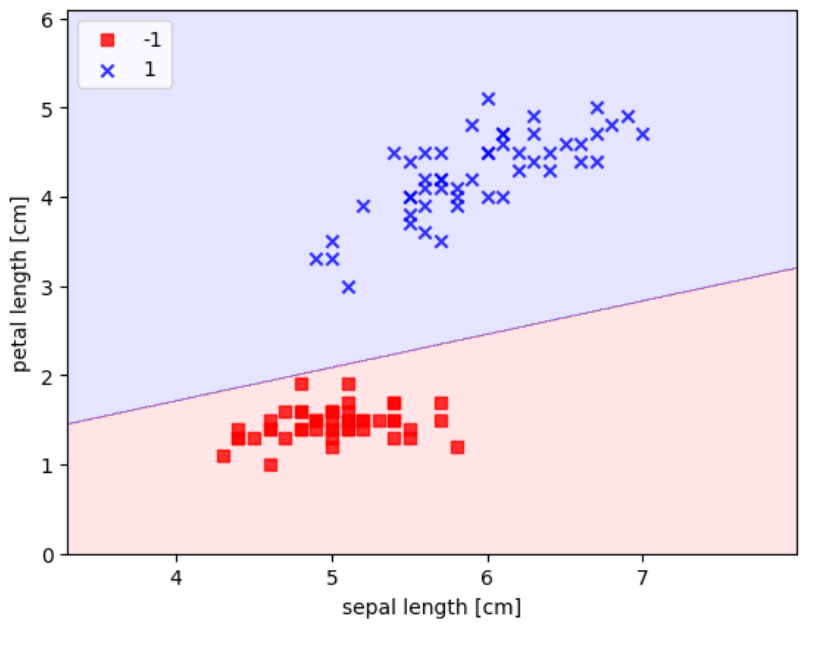


# Questão 2)

## Quanto maior o ruído maior será a mudança nos pontos originais, assim adicionando imperfeições no conjunto de dados e talvez evitando que o modelo memorize padrões corretos demais. Nos testes adicionei um ruído que não possibilitava uma classificação correta e um ruído baixo.

### Ruído 0.1
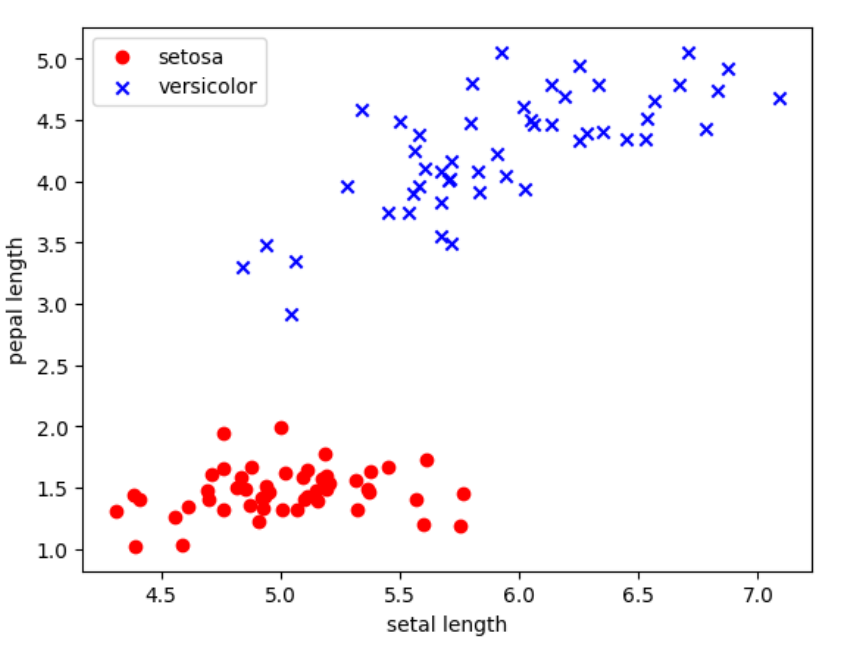

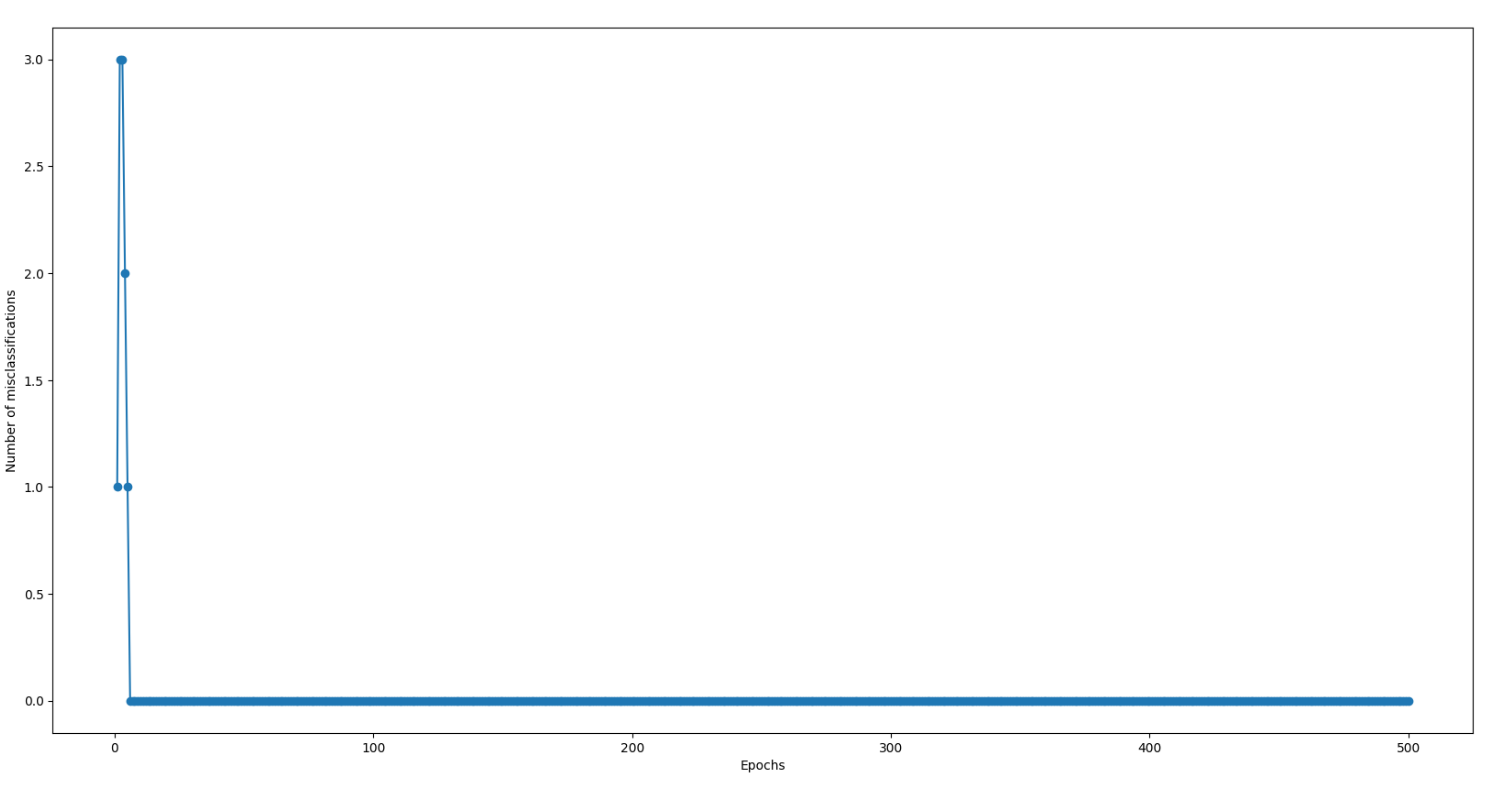

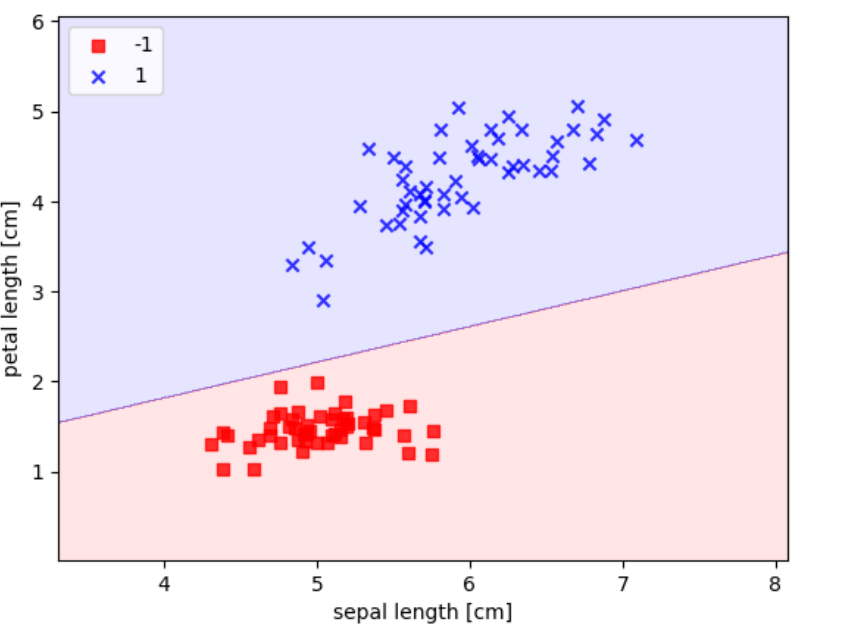

### Ruído 100

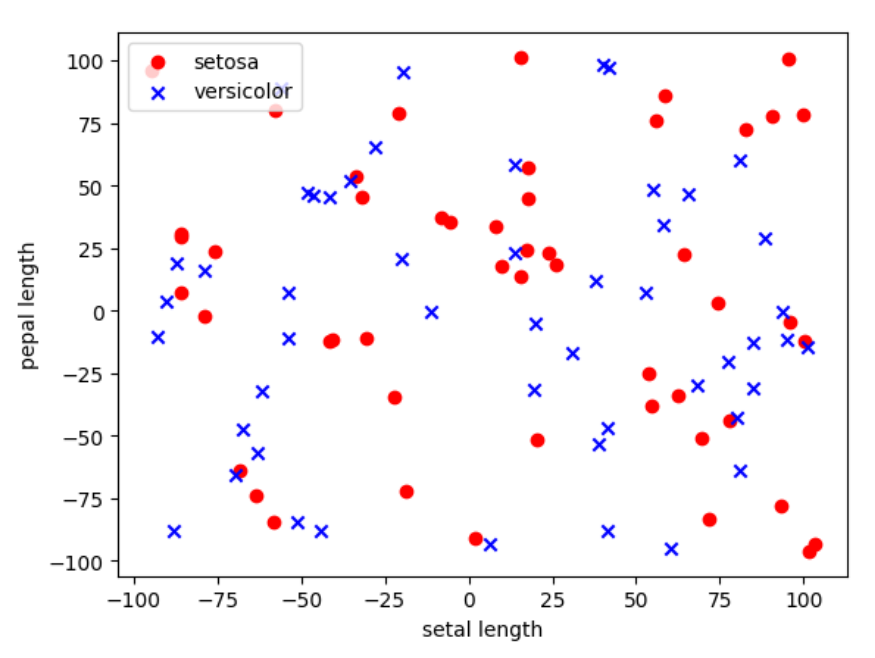
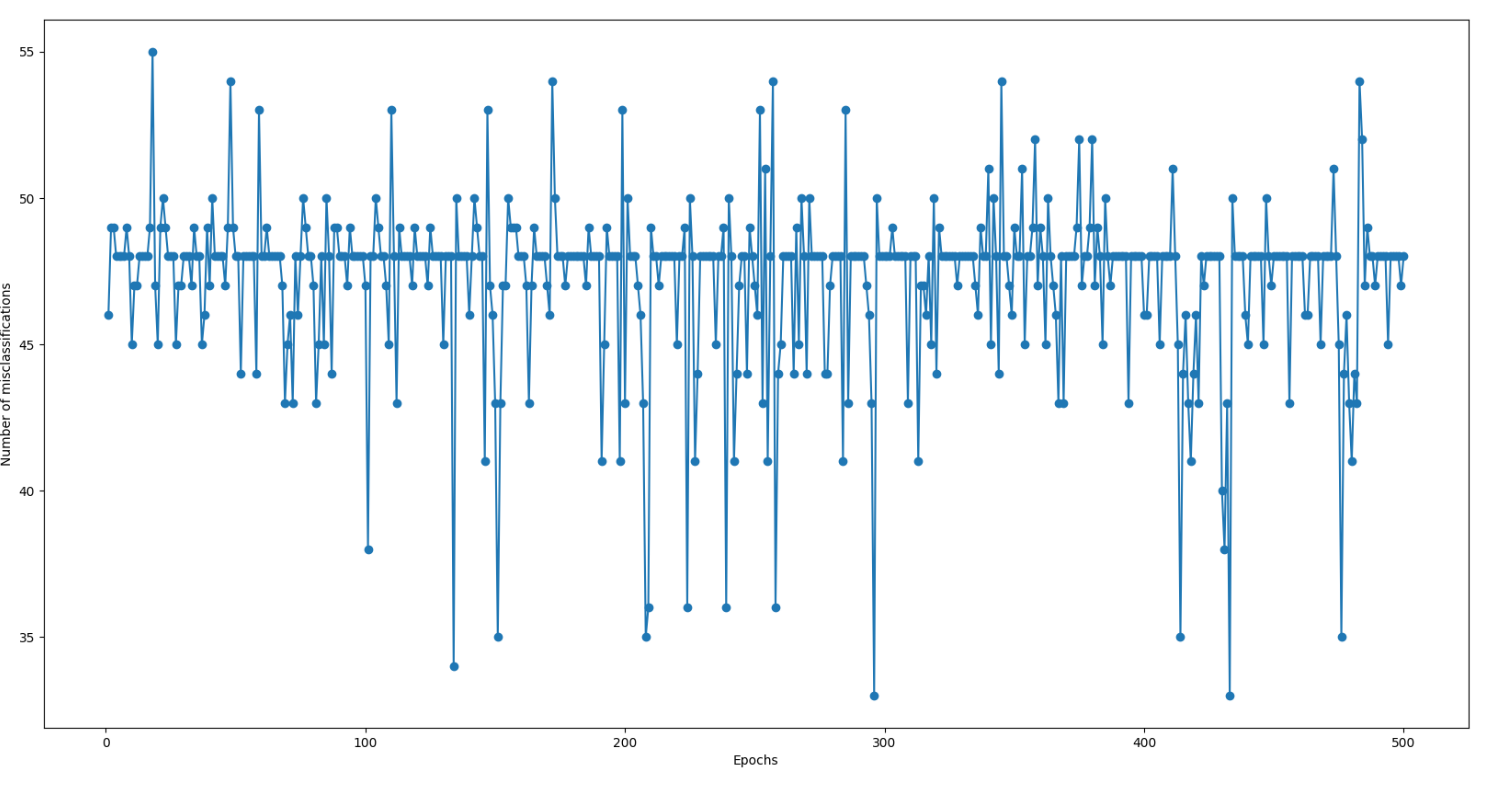



# Questão 3)

## O treinamento foi realizado com a combinação de variáveis "comprimento da sépala" e "largura da pétala". Adicionei 0.2 de ruído, 1 de taxa de aprendizagem e 15 épocas.

O número de erros caiu na 12º época e o perceptorn achou a fronteira de decisão que separa as amostras em duas classes. Como citado em sala o funcionamento se dá devido as classes seres linearmente separáveis.
